# SVM with Kernel Trick From Scratch

Implementation of Support Vector Machines with polynomial and RBF kernels from scratch.

## Features

- Linear SVM
- Polynomial Kernel
- RBF Kernel
- Custom SVM class
- Comparison with sklearn

In [12]:
import numpy as npimport matplotlib.pyplot as pltx = np.linspace(-5.0, 5.0, 100)y = np.sqrt(10**2 - x**2)y=np.hstack([y,-y])x=np.hstack([x,-x])

In [13]:
x1 = np.linspace(-5.0, 5.0, 100)y1 = np.sqrt(5**2 - x1**2)y1=np.hstack([y1,-y1])x1=np.hstack([x1,-x1])

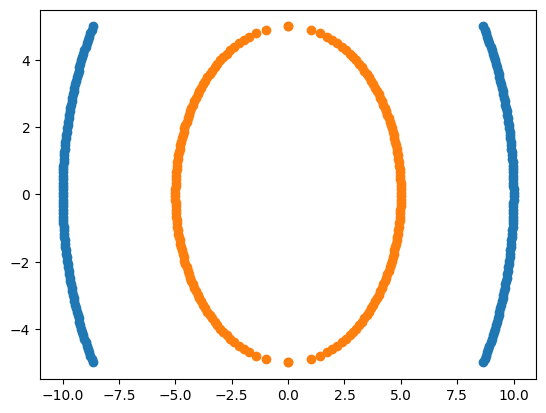

In [3]:
plt.scatter(y,x)plt.scatter(y1,x1)

In [4]:
#here we will see how we can use kernels to change this from 2d to 3d and classify the dataset

In [ ]:
# adding the points into dataframes
import pandas as pd

df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

df = pd.concat([df1, df2])
df.head(5)

In [16]:
#X1 and X2 are independent features and Y is dependent#.iloc is used for index-based selection of rows and columns.#:
    means “all rows”#:
        2 means “first two columns” (column 0 and column 1)X = df.iloc[:
            , :
                2]y = df.Y

In [17]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [19]:
#split the dataset into train and testfrom sklearn.model_selection
 import train_test_splitX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)#test_size=0.25	Use 25% of the data
 for testing, and the remaining 75%
 for training#random_state=0	Ensures the split is reproducible — same result every time you run it

In [20]:
from sklearn.svm import SVCclassifier = SVC(kernel ="linear") #here we are choosing the kernelclassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [21]:
from sklearn.metrics import accuracy_score y_pred = classifier.predict(X_test) accuracy_score(y_test,y_pred)

0.45

In [ ]:
# Since linear isn't a good option we would apply polynomial
# K(x,y) = (x^Ty+c)^d   T=Transpose here x is x1, x2 independent feature and y is also x1,x2
# so matrix multiplication would become:
# [x1][x1 x2]
# [x2]
# we need to find components for the polynomial kernel
# X1, X2, X1_square, X2_square, X1*X2 (if more features then there will be more columns)

df['X1_Square'] = df['X1'] ** 2
df['X2_square'] = df['X2'] ** 2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

In [32]:
X = df[['X1', 'X2', 'X1_Square', 'X2_square','X1*X2']]y = df['Y']

In [33]:
from sklearn.model_selection import train_test_splitX_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [34]:
X_train

,X1,X2,X1_Square,X2_square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [36]:
import plotly.express as pxfig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',              color='Y')fig.show()

In [43]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_square', z='X1*X2',              color='Y')fig.show()

In [38]:
classifier = SVC(kernel = "poly")classifier.fit(X_train, y_train)y_pred = classifier.predict(X_test)accuracy_score(y_test,y_pred)

1.0

In [1]:
#or if you don't want to create the componentsclassifier = SVC(kernel = "rbf")classifier.fit(X_train, y_train)

NameError: name 'SVC' is not defined

In [2]:
#SVM Advanced

In [1]:
import numpy as npimport pandas as pdimport matplotlib.pyplot as pltfrom mlxtend.plotting
 import plot_decision_regionsfrom sklearn.model_selection
 import train_test_splitfrom sklearn.metrics
 import accuracy_score, r2_scorefrom sklearn.utils
 import check_random_state, check_arrayfrom sklearn.svm
 import LinearSVC, LinearSVR, SVC, SVR, _libsvmfrom sklearn.preprocessing
 import LabelEncoderfrom sklearn.datasets
 import load_diabetes

In [2]:
#Linear SVM

In [ ]:
class LinearSVM:
    
    def __init__(self, regression=False, C=1.0, eps=0, learning_rate=0.001,
                 max_iter=1000, random_state=0):
        self.regression = regression
        self.C = C
        self.eps = eps
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        if self.regression:
            self.bias, self.weights = self._find_weights(X, y)
        else:
            classes = np.unique(y)
            n_classes = len(classes)
            _, n_features = X.shape
            self.bias = np.zeros(n_classes)
            self.weights = np.zeros((n_classes, n_features))
            np.random.seed(self.random_state)
            
            for i, cls in enumerate(classes):
                y_binary = np.where(y == cls, 1, -1)
                self.bias[i], self.weights[i] = self._find_weights(X, y_binary)
    
    def _find_weights(self, X, y):
        n_samples, n_features = X.shape
        bias = 0
        weights = np.zeros(n_features) if self.regression else np.random.randn(n_features)
        
        for _ in range(self.max_iter):
            for i in range(n_samples):
                y_pred = X[i] @ weights + bias
                margin = (y[i] - y_pred if self.regression else y[i] * y_pred)
                condition = (np.abs(margin) > self.eps if self.regression 
                            else margin < 1)
                
                if condition:
                    if self.regression:
                        db = -self.C * (margin - self.eps)
                        dw = -self.C * (margin - self.eps) * X[i]
                    else:
                        db = -self.C * y[i]
                        dw = -self.C * y[i] * X[i]
                    
                    bias -= self.learning_rate * db
                    weights -= self.learning_rate * dw
        
        return bias, weights
    
    def predict(self, X):
        scores = X @ self.weights.T + self.bias
        return scores if self.regression else np.argmax(scores, axis=1)

In [ ]:
class SVM:
    
    def __init__(self, regression=False, C=1.0, kernel='rbf', degree=3,
                 solver='auto', gamma='scale', epsilon=0.1, coef0=0.0,
                 shrinking=True, probability=False, tol=0.001,
                 cache_size=200, max_iter=-1, random_state=None):
        self.regression = regression
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.solver = solver
        self.gamma = gamma
        self.epsilon = epsilon
        self.coef0 = coef0
        self.shrinking = shrinking
        self.probability = probability
        self.tol = tol
        self.cache_size = cache_size
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        X = X.astype(np.float64)
        y = y.astype(np.float64)
        rnd = check_random_state(self.random_state)
        seed = rnd.randint(np.iinfo('i').max)
        
        if self.gamma == 'scale':
            self.gamma = 1.0 / (X.shape[1] * X.var()) if X.var() != 0 else 1.0
        elif self.gamma == 'auto':
            self.gamma = 1.0 / X.shape[1]
        
        if self.solver == 'auto':
            self.solver = 'epsilon_svr' if self.regression else 'c_svc'
        
        libsvm_impl = ['c_svc', 'nu_svc', 'one_class', 'epsilon_svr', 'nu_svr']
        self.solver = libsvm_impl.index(self.solver)
        
        (self.support_, self.support_vectors_, self._n_support, 
         self.dual_coef_, self.intercept_, self._probA, self._probB,
         self.fit_status_, self._num_iter) = _libsvm.fit(
            X, y, C=self.C, svm_type=self.solver, kernel=self.kernel,
            gamma=self.gamma, degree=self.degree, epsilon=self.epsilon,
            coef0=self.coef0, tol=self.tol, shrinking=self.shrinking,
            probability=self.probability, cache_size=self.cache_size,
            max_iter=self.max_iter, random_seed=seed)
    
    def predict(self, X_test):
        X_test = X_test.astype(np.float64)
        prediction = _libsvm.predict(
            X_test, self.support_, self.support_vectors_,
            self._n_support, self.dual_coef_, self.intercept_,
            self._probA, self._probB, svm_type=self.solver,
            kernel=self.kernel, degree=self.degree, coef0=self.coef0,
            gamma=self.gamma, cache_size=self.cache_size)
        
        return prediction if self.regression else prediction.astype(int)

In [ ]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes,
                         title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)
    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

In [12]:
df_path = "/content/iris.csv"iris = pd.read_csv(df_path)X1, y1 = iris.iloc[:
    , :
        -1], iris.iloc[:
            , -1]y1 = pd.Series(LabelEncoder().fit_transform(y1))X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, test_size=0.3, random_state=0)print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [13]:
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, random_state=0)print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
linear_svc = LinearSVM(random_state=0)
linear_svc.fit(X1_train, y1_train)
linear_svc_pred_res = linear_svc.predict(X1_test)
linear_svc_accuracy = accuracy_score(y1_test, linear_svc_pred_res)

print(f'LinearSVC accuracy: {linear_svc_accuracy}')
print(linear_svc_pred_res)

In [ ]:
sk_linear_svc = LinearSVC(loss='squared_hinge', max_iter=10000,
                          random_state=0)
sk_linear_svc.fit(X1_train, y1_train)
sk_linear_svc_pred_res = sk_linear_svc.predict(X1_test)
sk_linear_svc_accuracy = accuracy_score(y1_test, sk_linear_svc_pred_res)

print(f'sk LinearSVC accuracy: {sk_linear_svc_accuracy}')
print(sk_linear_svc_pred_res)

feature_indexes = [2, 3]
title1 = 'LinearSVC surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_linear_svc,
                      feature_indexes, title1)

In [16]:
svc = SVM(random_state=0, gamma='auto')svc.fit(X1_train, y1_train)svc_pred_res = svc.predict(X1_test)svc_accuracy = accuracy_score(y1_test, svc_pred_res)print(f'SVC accuracy:
    {svc_accuracy:
        }')print(svc_pred_res)

SVC accuracy: 0.9777777777777777
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


sk SVC accuracy: 0.9777777777777777
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


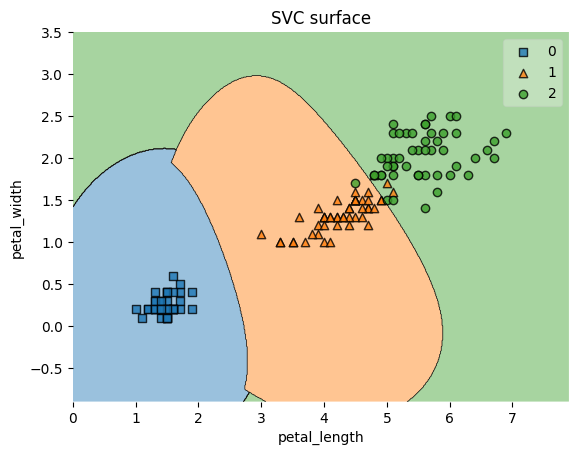

In [17]:
sk_svc = SVC(random_state=0, gamma='auto')sk_svc.fit(X1_train, y1_train)sk_svc_pred_res = sk_svc.predict(X1_test)sk_svc_accuracy = accuracy_score(y1_test, sk_svc_pred_res)print(f'sk SVC accuracy: {
sk_svc_accuracy:}
')print(sk_svc_pred_res)feature_indexes = [2, 3]title2 = 'SVC surface'decision_boundary_plot(X1, y1, X1_train, y1_train, sk_svc, feature_indexes, title2)

In [ ]:
linear_svr = LinearSVM(regression=True)
linear_svr.fit(X2_train, y2_train)
linear_svr_pred_res = linear_svr.predict(X2_test)
linear_svr_r2 = r2_score(y2_test, linear_svr_pred_res)

print(f'LinearSVR r2 score: {linear_svr_r2}')
print(linear_svr_pred_res)